In [1]:
import pandas as pd

# Diabetes

https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

- when using the above data from R.  
Note that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1).
-  whereas, in the R file, they are named  
age sex bmi map tc ldl hdl tch ltg glu y

___

## Data Set

In [2]:
df_ori=pd.read_csv('diabetes_origin.csv',sep='\t')
df_ori

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


### 변량 설명

- AGE

- SEX

- BMI: 체중/ 키^2

- BP (average blood pressure)

- S1~S6 (from blood serum)
 > - tc : total cholesterol (TC)-does not include Triglycerides
 > - ldl : low-density lipoprotein
 > - hdl : high-density lipoprotein
 > - tch : Serum total cholesterol (Tch)
 > - ltg 
 > - glu : 혈당

#### target
- y: 1년 후 당뇨병의 진행 상황을 정량적으로 기록.

### 훈련 - 검증/ 테스트 데이터 분할

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:

train_val, test = train_test_split(df_ori, test_size=0.2, random_state=0)


### 결손값

In [5]:
train_val.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

결손값은 없다.

### 산포도 확인

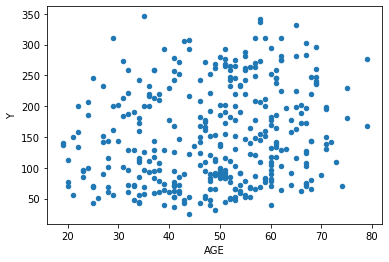

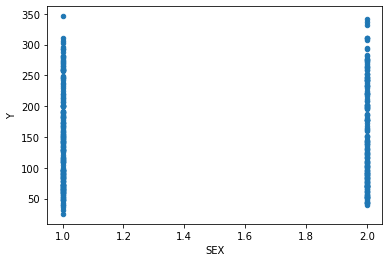

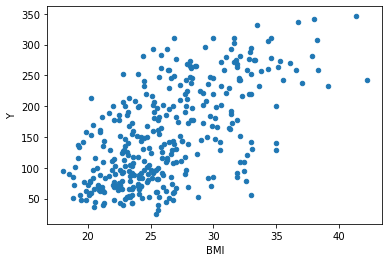

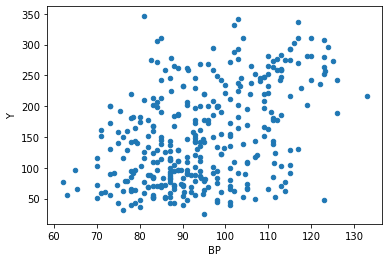

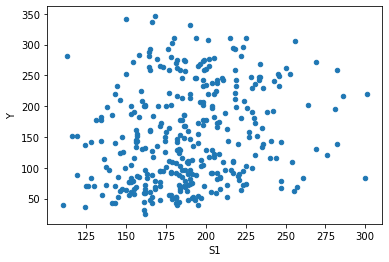

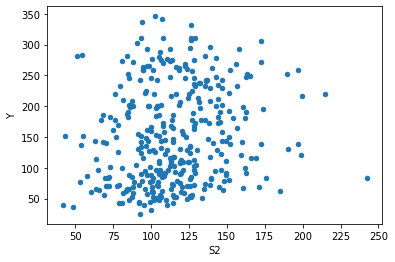

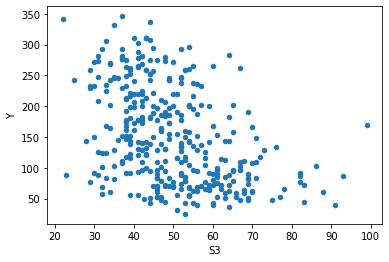

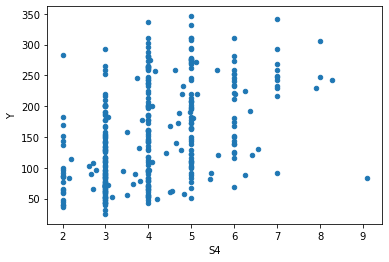

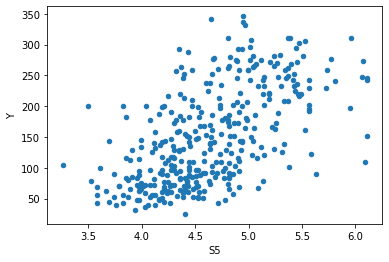

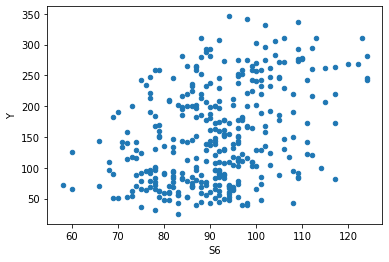

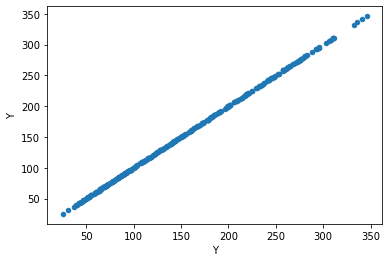

In [6]:
coln=train_val.columns
for name in coln:
    train_val.plot(kind='scatter', x=name, y='Y')

In [7]:
#age, sex, s4 제외할 예정에 앞서, 상관계수 살펴보기

In [8]:
train_val.corr()["Y"]

AGE    0.187709
SEX    0.040009
BMI    0.612887
BP     0.442841
S1     0.210114
S2     0.160665
S3    -0.429634
S4     0.447861
S5     0.587838
S6     0.381622
Y      1.000000
Name: Y, dtype: float64

0.1 미만은 지울 것.

- AGE, S4가 생각보다 높게 나왔다.
- S2가 생각보다 낮게 나왔다.

In [9]:
col_list=list(train_val.columns)
col_list.remove('SEX')
col_list

df=train_val.loc[:,col_list]
df2=df.loc[:,:'S6']

이상값 때문?

마할라노비스 거리

In [10]:
from sklearn.covariance import MinCovDet
mcd=MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(df2)
distance=mcd.mahalanobis(df2)
distance

array([   9.80964037,   10.15045436,    4.95116955,    7.79487659,
          4.29632603,    3.61741551,    3.24077724,   59.17871673,
         12.51662124,   11.25939487,    8.28625449,    5.2060547 ,
          7.715491  ,  867.68178083,    9.19007838,   36.45960745,
         14.50454992,  179.74419005,   96.51988877,    9.61733724,
          4.57967908,    9.55278188,    6.34954791, 1415.52118528,
         12.75519033,    9.74245113,   19.70701422,   10.72051209,
          6.73781198,   34.01794881,    7.53053829,    3.5064187 ,
          8.62185049,   14.12392863,   29.07127018,    5.6924088 ,
          4.4331225 ,  108.62814521,    4.81387502,   10.65664628,
         39.51370637,   23.86321327,   12.95836391,   10.79166637,
          4.6307497 ,    8.79836791,   10.95388119,  861.94870274,
         11.77466264,    7.25167328,   12.20721166,   11.58161148,
        163.60082632,    4.9148814 ,   37.68877629,    6.68783485,
          6.95251786,    6.91975214,    9.66710007,   10.38751

- 사분위범위=제3사분위수−제1사분위수

- 값이 큰 쪽의 이상값의 임계값=제3사분위수+1.5×IQR 
- 값이 작은 쪽의 이상값의 임계값=제1사분위수−1.5×IQR



<AxesSubplot:>

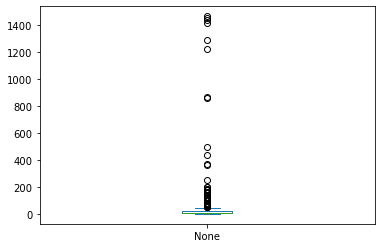

In [11]:
distance1=pd.Series(distance)
distance1.plot(kind='box')

In [12]:
tmp=distance1.describe()
tmp

count     353.000000
mean       55.659923
std       193.688007
min         2.123260
25%         6.831677
50%        10.327573
75%        23.028867
max      1463.246500
dtype: float64

In [13]:
iqr = tmp['75%'] - tmp['25%']  # IQR 
maxi = 1.5*(iqr) + tmp['75%']  # 상한값
mini = tmp['25%'] - 1.5*(iqr)  # 하한값

outlier = distance1[(distance > maxi) | (distance < mini)]
oi=outlier.index
print(iqr)
print(oi)

16.19718982162744
Int64Index([  7,  13,  17,  18,  23,  37,  47,  52,  65,  82,  90,  95, 112,
            113, 119, 131, 146, 160, 162, 167, 177, 182, 186, 187, 198, 206,
            211, 227, 234, 235, 241, 254, 255, 272, 283, 285, 287, 290, 291,
            293, 304, 306, 308, 314, 315, 316, 322, 325, 332, 344, 347, 348,
            350, 352],
           dtype='int64')


In [14]:
outlier.count()

54

In [15]:
ds=distance1.drop(oi,axis=0)
ds

0       9.809640
1      10.150454
2       4.951170
3       7.794877
4       4.296326
         ...    
343    10.291022
345     4.507557
346     2.929730
349     9.551128
351    10.395945
Length: 299, dtype: float64

In [16]:
dsi=ds.index

이상값 제거 완료

In [17]:
df3=df.iloc[dsi,:]

상관계수

In [18]:
df3_cor=df3.corr()['Y']
df3_cor

AGE    0.131957
BMI    0.579815
BP     0.382030
S1     0.094651
S2     0.137960
S3    -0.406594
S4     0.378688
S5     0.524374
S6     0.286662
Y      1.000000
Name: Y, dtype: float64

In [19]:
#S1 제거
col_list.remove('S1')
df4=df3.loc[:,col_list]

### 훈련 데이터와 검증 데이터의 분할

In [20]:
x=df4.loc[:,:'S6']
t=df4[['Y']]
x_train, x_val, y_train, y_val= train_test_split(x,t,test_size=0.2, random_state=0)

데이터 표준화

In [21]:
from sklearn.preprocessing import StandardScaler

sc_model_x =StandardScaler()
sc_model_x.fit(x_train)

sc_x=sc_model_x.transform(x_train)

In [22]:
sc_model_y=StandardScaler()
sc_model_y.fit(y_train)
sc_y=sc_model_y.transform(y_train)

### 모델 작성과 학습

In [23]:
model=LinearRegression()
model.fit(sc_x,sc_y)

LinearRegression()

In [24]:
#x_val과 y_val도 sc_model_x의 저장된 훈련 정보를 토대로 변환

In [25]:
sc_x_val=sc_model_x.transform(x_val)
sc_y_val=sc_model_y.transform(y_val)
model.score(sc_x_val, sc_y_val)

0.5715234903594705

### 튜닝

In [26]:
def learn(x, t) :
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)
 # 훈련 데이터의 표준화
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
 # 학습
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
 # 검증 데이터를 표준화
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
 # 훈련 데이터와 검증 데이터의 결정계수 계산
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

상관계수 0.2미만인 AGE와 S2까지 제거.

In [27]:
col_list2=col_list.copy()
col_list3=col_list.copy()
col_list.remove('Y')
col_list.remove('AGE')
col_list.remove('S2')

x=df4.loc[:,col_list]
t=df4[['Y']]
s1,s2=learn(x,t)
print(s1,s2)

0.4307697839623823 0.5614325270978421


AGE 다시 넣기

In [28]:
col_list2.remove('Y')
col_list2.remove('S2')
x=df4.loc[:,col_list2]
t=df4[['Y']]
s1,s2=learn(x,t)
print(s1,s2)

0.43801636341982453 0.5620093769760884


S2도 다시 넣기.

In [29]:
col_list=col_list3.copy()

### 특징량 엔지니어링

In [30]:
col_list

['AGE', 'BMI', 'BP', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [31]:
col_list.remove('Y')

In [32]:
x=df4.loc[:,col_list]
t=df4[['Y']]

In [33]:
x['S2_2']=x['S2']**2
x['BP_1/2']=x['BP']**(1/2)
x['S3_2']=(-x['S3'])**2

In [34]:
s1,s2=learn(x,t)
print(s1,s2)

0.44724406406181005 0.5686920823491453


In [35]:
x=x.drop('S3_2',axis=1)
s1,s2=learn(x,t)
print(s1,s2)

0.44668844669035024 0.5687077980093502


In [36]:
x=x.drop('S2_2',axis=1)
s1,s2=learn(x,t)
print(s1,s2)

0.44650674767965615 0.5715482379431723


In [37]:
x['S2_3']=x['S2']**3
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S2_3',axis=1)

0.44666383761223005 0.5692424178669484


In [38]:
#현재까지 BP_1/2: 0.5715...

In [39]:
x['S5_2']=x['S5']**(1/2)
x['S6_2']=x['S6']**2

In [40]:
s1,s2=learn(x,t)
print(s1,s2)

0.4672891854060549 0.5453417682355031


In [41]:
x=x.drop('S5_2',axis=1)
s1,s2=learn(x,t)
print(s1,s2)

0.4635534852027169 0.547910959333559


In [42]:
x=x.drop('S6_2',axis=1)
s1,s2=learn(x,t)
print(s1,s2)

0.44650674767965615 0.5715482379431723


In [43]:
#BP_1/2 : 0.5715...

In [44]:
x['S6_3']=x['S6']**3
s1,s2=learn(x,t)
print(s1,s2)

0.4641754097837205 0.5476836294968902


In [45]:
x=x.drop('S6_3',axis=1)
s1,s2=learn(x,t)
print(s1,s2)

0.44650674767965615 0.5715482379431723


In [46]:
x['S6_4']=x['S6']**4
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S6_4',axis=1)

0.4646054604403217 0.5476014518966635


In [47]:
x

,AGE,BMI,BP,S2,S3,S4,S5,S6,BP_1/2
74,52,26.6,111.0,126.4,61.0,3.0,4.6821,109,10.535654
26,19,19.2,87.0,54.0,57.0,2.0,4.1744,90,9.327379
45,56,23.1,104.0,116.4,47.0,4.0,4.4773,79,10.198039
389,47,26.5,70.0,104.8,63.0,3.0,4.1897,70,8.366600
154,67,28.3,93.0,132.2,49.0,4.0,4.7362,92,9.643651
...,...,...,...,...,...,...,...,...,...
211,74,29.8,101.0,104.8,50.0,3.0,4.3944,86,10.049876
359,59,26.9,104.0,126.6,43.0,5.0,4.8040,106,10.198039
195,56,28.7,99.0,146.4,39.0,5.0,4.7274,97,9.949874
192,64,23.5,97.0,129.0,59.0,3.0,4.3175,77,9.848858


In [48]:
x['BMI_2']=x['BMI']**2
s1,s2=learn(x,t)
print(s1,s2)

0.44955826179935376 0.5840969889363663


In [49]:
x['BMI_3']=x['BMI']**3
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BMI_3',axis=1)

0.45450237827216333 0.5649482960294115


In [50]:
##BP_1/2, BMI_2: 0.584096...

In [51]:
x['BnS2']=x['BMI']*x['S2']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BnS2',axis=1)

0.45049251173511284 0.5816233074816203


In [52]:
x['S3_2']=x['S3']**5
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S3_2',axis=1)

0.44958114854348363 0.5838512906006316


In [53]:
x['BP_22']=x['BP']**2
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BP_22',axis=1)

0.4539091337766511 0.5811468827938863


In [54]:
##BP_1/2, BMI_2: 0.584096...

In [55]:
x['BP_3']=x['BP']**3
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BP_3',axis=1)

0.4538808890388609 0.5815916233655873


In [56]:
x['BPnS2']=x['BP']*x['S2']
s1,s2=learn(x,t)
print(s1,s2)

0.45004618109491257 0.5850164843692381


In [57]:
x

,AGE,BMI,BP,S2,S3,S4,S5,S6,BP_1/2,BMI_2,BPnS2
74,52,26.6,111.0,126.4,61.0,3.0,4.6821,109,10.535654,707.56,14030.4
26,19,19.2,87.0,54.0,57.0,2.0,4.1744,90,9.327379,368.64,4698.0
45,56,23.1,104.0,116.4,47.0,4.0,4.4773,79,10.198039,533.61,12105.6
389,47,26.5,70.0,104.8,63.0,3.0,4.1897,70,8.366600,702.25,7336.0
154,67,28.3,93.0,132.2,49.0,4.0,4.7362,92,9.643651,800.89,12294.6
...,...,...,...,...,...,...,...,...,...,...,...
211,74,29.8,101.0,104.8,50.0,3.0,4.3944,86,10.049876,888.04,10584.8
359,59,26.9,104.0,126.6,43.0,5.0,4.8040,106,10.198039,723.61,13166.4
195,56,28.7,99.0,146.4,39.0,5.0,4.7274,97,9.949874,823.69,14493.6
192,64,23.5,97.0,129.0,59.0,3.0,4.3175,77,9.848858,552.25,12513.0


In [58]:
x['BnB']=x['BMI']*x['BP']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BnB',axis=1)

0.467000529081796 0.5453333933304173


In [59]:
x['S2n6']=x['S2']*x['S6']
s1,s2=learn(x,t)
print(s1,s2)

0.4515948154660382 0.5868322972480751


In [60]:
x['S3n6']=x['S3']*x['S6']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S3n6',axis=1)

0.45831319649904634 0.5573195698156588


In [61]:
x['S5n6']=x['S5']*x['S6']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S5n6',axis=1)

0.45861575726221526 0.5662113345769823


In [62]:
x

,AGE,BMI,BP,S2,S3,S4,S5,S6,BP_1/2,BMI_2,BPnS2,S2n6
74,52,26.6,111.0,126.4,61.0,3.0,4.6821,109,10.535654,707.56,14030.4,13777.6
26,19,19.2,87.0,54.0,57.0,2.0,4.1744,90,9.327379,368.64,4698.0,4860.0
45,56,23.1,104.0,116.4,47.0,4.0,4.4773,79,10.198039,533.61,12105.6,9195.6
389,47,26.5,70.0,104.8,63.0,3.0,4.1897,70,8.366600,702.25,7336.0,7336.0
154,67,28.3,93.0,132.2,49.0,4.0,4.7362,92,9.643651,800.89,12294.6,12162.4
...,...,...,...,...,...,...,...,...,...,...,...,...
211,74,29.8,101.0,104.8,50.0,3.0,4.3944,86,10.049876,888.04,10584.8,9012.8
359,59,26.9,104.0,126.6,43.0,5.0,4.8040,106,10.198039,723.61,13166.4,13419.6
195,56,28.7,99.0,146.4,39.0,5.0,4.7274,97,9.949874,823.69,14493.6,14200.8
192,64,23.5,97.0,129.0,59.0,3.0,4.3175,77,9.848858,552.25,12513.0,9933.0


In [63]:
x['BP_1/3']=x['BP']**(1/3)
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BP_1/3',axis=1)

0.45680526534584753 0.5819364626824862


In [64]:
x['BMInS4']=x['BMI']*x['S4']
s1,s2=learn(x,t)
print(s1,s2)

0.4520548839047469 0.5895103567531289


In [65]:
x['BPnS4']=x['BP']*x['S4']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('BPnS4',axis=1)

0.4539145117237393 0.5780859462439385


In [66]:
x['S4nS5']=x['S5']*x['S4']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S4nS5',axis=1)

0.45299528870634065 0.5845425618784903


In [67]:
x['S3nS4']=(-x['S3'])*x['S4']
s1,s2=learn(x,t)
print(s1,s2)
x=x.drop('S3nS4',axis=1)

0.4525169220408447 0.585858597679815


In [68]:
x['S4_2']=x['S4']**2
s1,s2=learn(x,t)
print(s1,s2)

0.4527062708948433 0.5828296425354608


In [69]:
x=x.drop('S4_2',axis=1)

In [70]:
learn(x,t)

(0.4520548839047469, 0.5895103567531289)

In [93]:
x=x.drop('S2n6',axis=1)
x=x.drop('S2',axis=1)
x=x.drop('BPnS2',axis=1)

In [98]:
x=x.drop('S6',axis=1)
x=x.drop('AGE',axis=1)

In [99]:
learn(x,t)

(0.4449457896302469, 0.5857275514211406)

### 재학습

In [100]:
sc_model_x2=StandardScaler()
sc_model_x2.fit(x)
sc_x=sc_model_x2.transform(x)

sc_model_y2=StandardScaler()
sc_model_y2.fit(t)
sc_y=sc_model_y2.transform(t)

model=LinearRegression()
model.fit(sc_x,sc_y)

LinearRegression()

### 테스트 데이터로 평가

In [101]:
x

,BMI,BP,S3,S4,S5,BP_1/2,BMI_2,BMInS4
74,26.6,111.0,61.0,3.0,4.6821,10.535654,707.56,79.8
26,19.2,87.0,57.0,2.0,4.1744,9.327379,368.64,38.4
45,23.1,104.0,47.0,4.0,4.4773,10.198039,533.61,92.4
389,26.5,70.0,63.0,3.0,4.1897,8.366600,702.25,79.5
154,28.3,93.0,49.0,4.0,4.7362,9.643651,800.89,113.2
...,...,...,...,...,...,...,...,...
211,29.8,101.0,50.0,3.0,4.3944,10.049876,888.04,89.4
359,26.9,104.0,43.0,5.0,4.8040,10.198039,723.61,134.5
195,28.7,99.0,39.0,5.0,4.7274,9.949874,823.69,143.5
192,23.5,97.0,59.0,3.0,4.3175,9.848858,552.25,70.5


In [102]:
test.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [112]:
x1 = ['BMI', 'BP', 'S3', 'S4', 'S5']

In [113]:
x_test=test.loc[:,x1]
y_test=test[['Y']]

x_test['BP_1/2']=x_test['BP']**(1/2)
x_test['BMI_2']=x_test['BMI']**2
x_test['BMInS4']=x_test['BMI']*x_test['S4']

sc_x_test=sc_model_x2.transform(x_test)
sc_y_test=sc_model_y2.transform(y_test)

In [114]:
x_test

,BMI,BP,S3,S4,S5,BP_1/2,BMI_2,BMInS4
362,36.1,115.0,43.0,4.0,4.6821,10.723805,1303.21,144.4
249,32.0,110.0,45.0,5.0,5.4116,10.488088,1024.00,160.0
271,27.2,107.0,39.0,4.0,4.4427,10.344080,739.84,108.8
435,24.2,83.0,45.0,4.0,4.2195,9.110434,585.64,96.8
400,30.6,121.0,69.0,3.0,4.2627,11.000000,936.36,91.8
...,...,...,...,...,...,...,...,...
381,18.1,73.0,41.0,4.0,4.4998,8.544004,327.61,72.4
213,19.8,88.0,57.0,3.0,4.3944,9.380832,392.04,59.4
134,30.4,85.0,67.0,3.0,4.3438,9.219544,924.16,91.2
49,27.7,93.0,30.0,6.0,5.0304,9.643651,767.29,166.2


In [115]:
model.score(sc_x_test,sc_y_test)

0.30626412680171

#### R^2= 0.30626412680171

In [78]:
print(model.coef_)
print(model.intercept_)
    

[[-0.04795232 -0.38537986  1.12294952 -0.48662508 -0.17360812 -0.24885534
   0.29817236 -0.14321082 -1.01646868  0.56979614  0.12507087  0.35681077
   0.3651748 ]]
[-1.65824385e-15]


In [79]:
tmp=pd.DataFrame(model.coef_.round(3))
tmp.columns=x_test.columns
tmp

,AGE,BMI,BP,S2,S3,S4,S5,S6,BP_1/2,BMI_2,BPnS2,S2n6,BMInS4
0,-0.048,-0.385,1.123,-0.487,-0.174,-0.249,0.298,-0.143,-1.016,0.57,0.125,0.357,0.365


In [87]:
abs(pd.concat([x, t] , axis=1).corr()['Y']).sort_values()

AGE       0.131957
S2        0.137960
S2n6      0.223943
BPnS2     0.274845
S6        0.286662
BP_1/2    0.377123
S4        0.378688
BP        0.382030
S3        0.406594
S5        0.524374
BMInS4    0.549798
BMI       0.579815
BMI_2     0.581447
Y         1.000000
Name: Y, dtype: float64

$$y=-0.048\times AGE	-0.385\times BMI	+1.123\times BP	-0.487\times S2	-0.174\times S3	   \\-0.249	\times S4+	0.298\times S5	-0.143\times S6	-1.016\times BP\_1/2\\+	0.57\times BMI\_2 +0.125	\times BPnS2+	0.357\times S2n6+	0.365\times BMInS4 -1.65824385e-15$$